---
# Data Visualization in Python

### Rachid Benmouhoub - ASTRAI Seminar — Winter Semester 2025/26
---

## Agenda

| Topic | Time |
|-------|------|
| Python Visualization Landscape | 5 min |
| Setup & Data | 3 min |
| **Part 1:** Matplotlib — Intelligent Styling | 12 min |
| **Part 2:** Seaborn — Statistical Depth | 12 min |
| **Part 3:** Plotly & Folium — Interactivity | 12 min |
| Hands-on Activity | 7 min |
| Wrap-up | 4 min |

---
# The Python Visualization Landscape

### A rich ecosystem
---

![Python Visualization Landscape](https://rougier.github.io/python-visualization-landscape/landscape-colors.png)

*Source: [Nicolas Rougier / Jake VanderPlas](https://github.com/rougier/python-visualization-landscape)*

## Selection Criteria

When choosing a visualization library, consider the following decision factors:

| Criterion | Matplotlib | Seaborn | Plotly | Folium |
|-----------|:----------:|:-------:|:------:|:------:|
| **Rendering target** | Desktop/Static | Desktop/Static | Web/Interactive | Web/Interactive |
| **3D capabilities** | Basic | — | Advanced | — |
| **Large data handling** | Moderate | Moderate | Good (WebGL) | Good (clustering) |
| **Active community** | Very large | Large | Large | Moderate |
| **Documentation quality** | Extensive | Good | Extensive | Good |



**Challenge:** The abundance of options can be overwhelming for practitioners.  
**Approach:** Focus on four core libraries that address the majority of visualization requirements.

1. **Static publication** → Matplotlib or Seaborn
2. **Statistical analysis** → Seaborn
3. **Interactive dashboards** → Plotly
4. **Geographic data** → Folium
5. **Maximum control** → Matplotlib


## Ten Principles of Effective Data Visualization

*Based on Midway (2020), Patterns*

| # | Principle | Description | Workshop Section |
|---|-----------|-------------|------------------|
| 1 | **Diagram First** | Design the message before engaging with software | - |
| 2 | **Use the Right Software** | Select tools appropriate for complexity | **Selection Criteria** |
| 3 | **Use Effective Geometry** | Choose geometries based on data type; maximize data-ink ratio | **Part 2:** Violin, Pair plots |
| 4 | **Colors Always Mean Something** | Apply color intentionally (sequential, diverging, qualitative) | **Part 1:** Semantic Coloring |
| 5 | **Include Uncertainty** | Visualize confidence intervals and uncertainty metrics | **Part 2:** Regression + CI |
| 6 | **Panel When Possible** | Use small multiples for direct comparisons | **Part 2:** Pair plots |
| 7 | **Data ≠ Models** | Distinguish raw data from inferential statistics | **Part 2:** Regression plots |
| 8 | **Simple Visuals, Detailed Captions** | Keep figures clean; explain in captions | **Part 1:** `sns.despine()` |
| 9 | **Consider Infographics** | Blend text, images, diagrams for communication | **Part 3:** Custom Popups |
| 10 | **Get an Opinion** | Seek external review of figures | - |  

<p align="left">
    <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*ZAiipLzSgw9xrPRuFjvjjg.png" width="40%">
</p>

*Source: [Anastasiya Kuznetsova – Gestalt Principles in Data Visualization](https://nastengraph.medium.com/gestalt-principles-in-data-visualization-a4e56e6074b5)*

---
# Setup & Data
---

In [25]:
# Run this cell first!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium.plugins import HeatMap

# Fix for Plotly rendering in Jupyter
try:
    import nbformat
except ImportError:
    import subprocess
    subprocess.run(['pip', 'install', 'nbformat'], check=True)
    import nbformat

print("Libraries loaded!")

Libraries loaded!


## The Dataset: Darmstadt Taxi Trips

Simulated taxi data with these columns:

| Column | Description |
|--------|-------------|
| `distance` | Trip distance (km) |
| `fare` | Fare amount (EUR) |
| `tip`, `tip_pct` | Tip amount and percentage |
| `passengers` | Number of passengers |
| `pickup_lat`, `pickup_lon` | Pickup coordinates |
| `hour`, `day` | Time of pickup |
| `is_weekend` | Weekend flag |

In [26]:
# Generate sample data: Darmstadt Taxi Trips
np.random.seed(42)
n = 3000

# Darmstadt coordinates: 49.8728, 8.6512
trips = pd.DataFrame({
    'distance': np.random.exponential(3, n),
    'passengers': np.random.choice([1, 1, 1, 2, 2, 3, 4], n),
    'hour': np.random.choice(range(24), n),
    'day': np.random.choice(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], n),
    'pickup_lat': np.random.normal(49.8728, 0.02, n),
    'pickup_lon': np.random.normal(8.6512, 0.02, n),
})

trips['fare'] = 2.5 + trips['distance'] * 2.5 + np.random.normal(0, 2, n)
trips['fare'] = trips['fare'].clip(lower=2.5)
trips['tip'] = trips['fare'] * np.random.uniform(0.05, 0.30, n)
trips['tip_pct'] = trips['tip'] / trips['fare'] * 100
trips['is_weekend'] = trips['day'].isin(['Sat', 'Sun'])

print(f"Loaded {len(trips)} taxi trips")
trips.head()

Loaded 3000 taxi trips


,distance,passengers,hour,day,pickup_lat,pickup_lon,fare,tip,tip_pct,is_weekend
0,1.407804,1,15,Thu,49.850995,8.665895,6.277455,0.725193,11.552347,False
1,9.030364,1,18,Wed,49.869955,8.621955,20.348580,5.640765,27.720680,False
2,3.950237,2,8,Mon,49.903094,8.648445,14.366841,4.131072,28.754209,False
3,2.738828,4,4,Sat,49.881013,8.621725,9.491216,1.113210,11.728841,True
4,0.508875,3,7,Tue,49.877457,8.645286,5.312934,1.267403,23.855047,False


---
# Part 1: Intelligent Styling

### Applying design principles programmatically

---

## 1.1 Matplotlib Fundamentals

**Concept:** Understanding the difference between cluttered and refined visualizations.

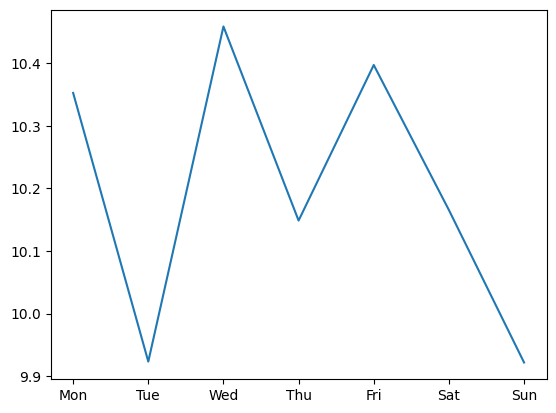

In [27]:
# Default Matplotlib output

# Definiere die richtige Reihenfolge
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Gruppieren und sortieren mit reindex
daily = trips.groupby('day')['fare'].mean().reindex(day_order)

fig, ax = plt.subplots()
ax.plot(daily)
plt.show()

Elements of Matplotlib-Charts

<p align="left">
    <img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png" width="30%">
</p>

*Source: [matplotlib.org](https://matplotlib.org/stable/gallery/showcase/anatomy.html)*

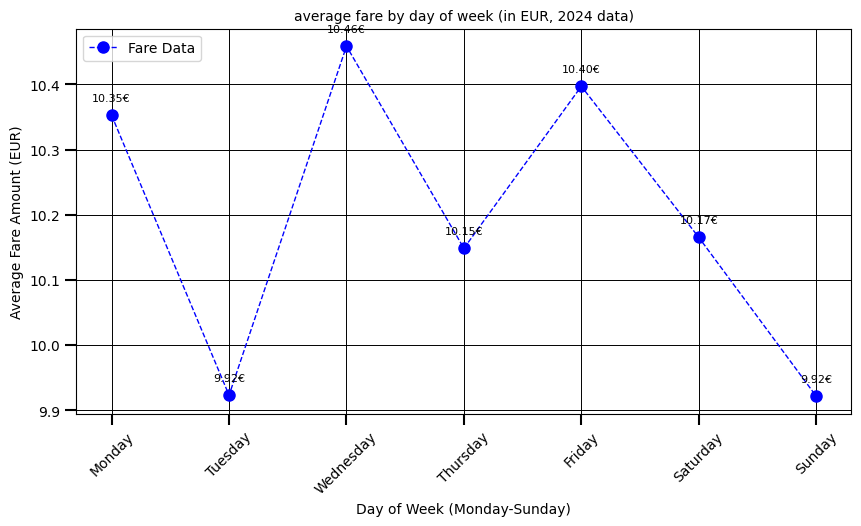

In [28]:
# cluttered Matplotlib output
daily = trips.groupby('day')['fare'].mean()
day_order_full = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_map = {'Mon': 'Monday', 'Tue': 'Tuesday', 'Wed': 'Wednesday', 
           'Thu': 'Thursday', 'Fri': 'Friday', 'Sat': 'Saturday', 'Sun': 'Sunday'}
daily_full = daily.rename(index=day_map).reindex(day_order_full)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(day_order_full, daily_full, marker='o', color='blue',
          linestyle='--', linewidth=1, markersize=8)

# title and labels
ax.set_title('average fare by day of week (in EUR, 2024 data)', fontsize=10)
ax.set_xlabel('Day of Week (Monday-Sunday)')
ax.set_ylabel('Average Fare Amount (EUR)')

# grid on both axes
ax.grid(True, which='both', color='black', linestyle='-', linewidth=0.7)

# Rotated labels
ax.tick_params(axis='x', rotation=45)

# Major + Minor ticks
ax.tick_params(axis='both', which='major', length=8, width=1.5)
ax.tick_params(axis='both', which='minor', length=4, width=1)

# data labels on each point
for i, val in enumerate(daily_full.values):
    ax.annotate(f'{val:.2f}€', (i, val),
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# legend
ax.legend(['Fare Data'], loc='upper left', frameon=True)

plt.show()

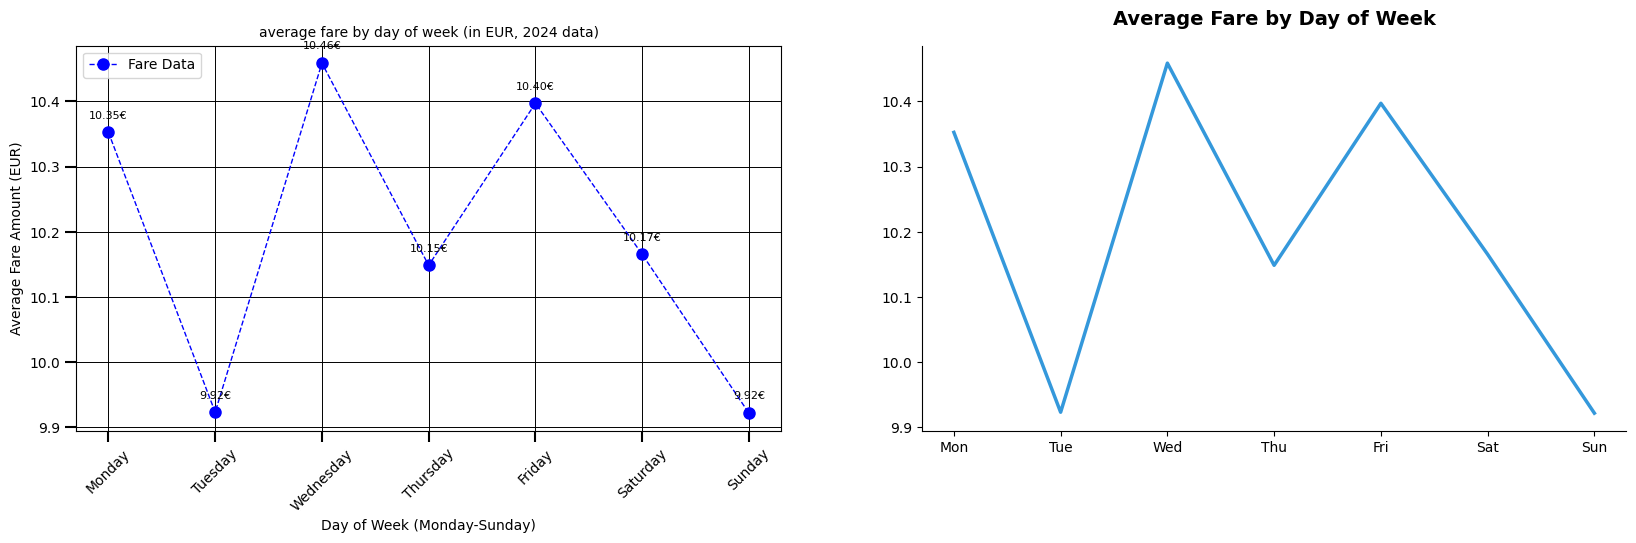

In [47]:
# Subplots mit 1 Zeile, 2 Spalten (nebeneinander)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Left plot: cluttered Matplotlib output
ax1.plot(day_order_full, daily_full, marker='o', color='blue',
          linestyle='--', linewidth=1, markersize=8)
ax1.set_title('average fare by day of week (in EUR, 2024 data)', fontsize=10)
ax1.set_xlabel('Day of Week (Monday-Sunday)')
ax1.set_ylabel('Average Fare Amount (EUR)')
ax1.grid(True, which='both', color='black', linestyle='-', linewidth=0.7)
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='both', which='major', length=8, width=1.5)
ax1.tick_params(axis='both', which='minor', length=4, width=1)
for i, val in enumerate(daily_full.values):
    ax1.annotate(f'{val:.2f}€', (i, val),
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)
ax1.legend(['Fare Data'], loc='upper left', frameon=True)

# Right plot: Refined Matplotlib output
ax2.plot(day_order, daily_full.values, color='#3498db', linewidth=2.5)
sns.despine(ax=ax2, left=True, bottom=True)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Average Fare by Day of Week', fontsize=14, fontweight='bold', pad=15)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)
ax2.yaxis.grid(False)
ax2.xaxis.grid(False)

plt.show()

## 1.2 Automated Highlighting

**Concept:** Use conditional color mapping to draw attention to important data points automatically.

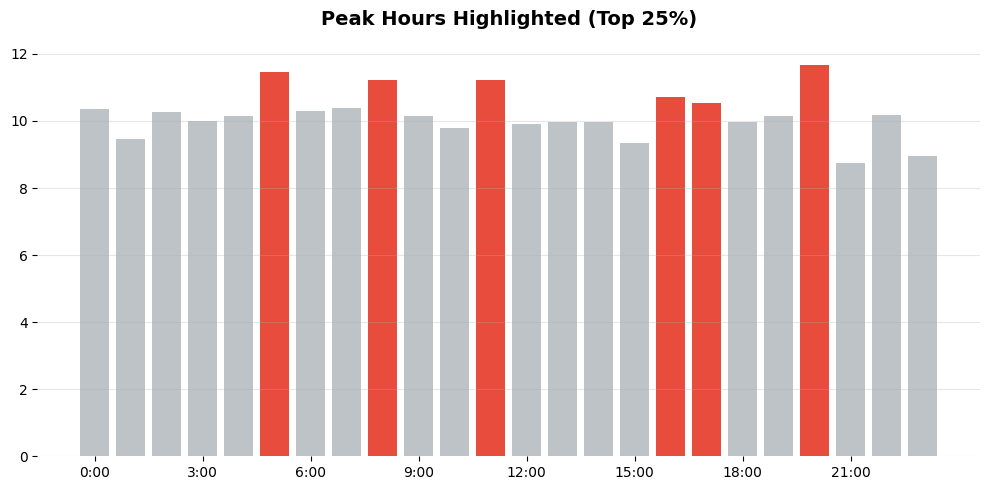

Threshold: €10.42 (values above this are highlighted)


In [30]:
# Compute threshold for highlighting
hourly = trips.groupby('hour')['fare'].mean()
threshold = hourly.quantile(0.75)  # Top 25%

# Apply conditional color mapping
colors = ['#e74c3c' if val >= threshold else '#bdc3c7' for val in hourly.values]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(hourly.index, hourly, color=colors, edgecolor='none')

sns.despine(ax=ax, left=True, bottom=True)
ax.yaxis.grid(True, alpha=0.3)
ax.xaxis.grid(False)

ax.set_title('Peak Hours Highlighted (Top 25%)', fontsize=14, fontweight='bold', pad=15)
ax.set_xticks(range(0, 24, 3))
ax.set_xticklabels([f'{h}:00' for h in range(0, 24, 3)])

fig.tight_layout()
plt.show()

print(f"Threshold: €{threshold:.2f} (values above this are highlighted)")

## 1.3 Multidimensional Encoding: Scatterplots

**Concept:** Encode multiple variables simultaneously using position (x, y), color, and size.

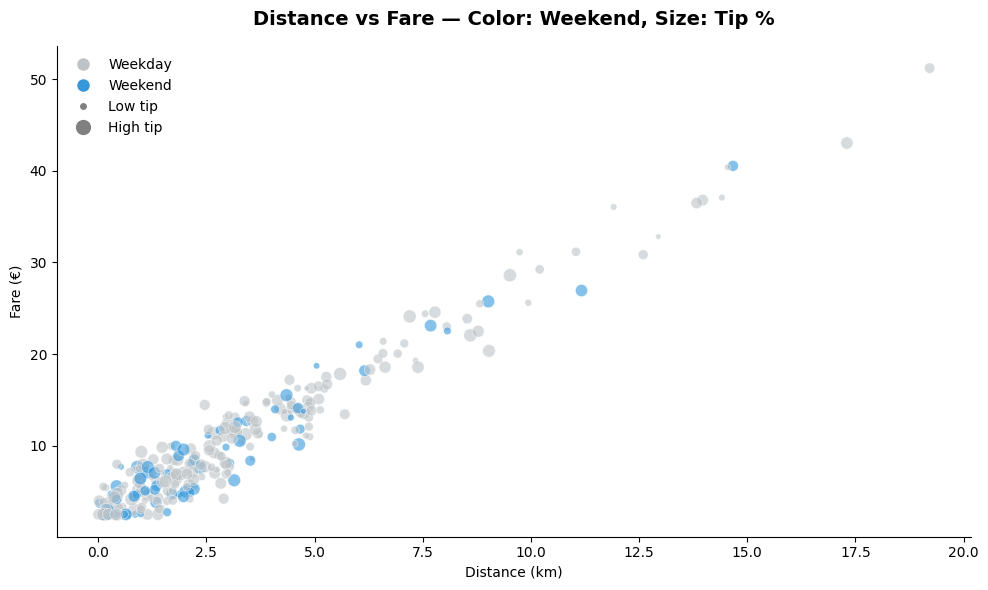

4 dimensions encoded: x=distance, y=fare, color=weekend, size=tip%


In [31]:
# Scatterplot with color AND size encoding
sample = trips.sample(300)

fig, ax = plt.subplots(figsize=(10, 6))

# Color = Weekend (categorical), Size = Tip percentage (continuous)
colors = ['#3498db' if w else '#bdc3c7' for w in sample['is_weekend']]
sizes = sample['tip_pct'] * 3  # Scale for visibility

scatter = ax.scatter(sample['distance'], sample['fare'], 
                     c=colors, s=sizes, alpha=0.6, edgecolors='white', linewidth=0.5)

sns.despine(ax=ax)
ax.set_title('Distance vs Fare — Color: Weekend, Size: Tip %', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Fare (€)')

# Manual legend for color
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#bdc3c7', markersize=10, label='Weekday'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#3498db', markersize=10, label='Weekend'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=6, label='Low tip'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=12, label='High tip'),
]
ax.legend(handles=legend_elements, loc='upper left', frameon=False)

fig.tight_layout()
plt.show()

print("4 dimensions encoded: x=distance, y=fare, color=weekend, size=tip%")

## Exercise: Passenger Distribution

**Task:** Create a bar chart showing the number of trips by passenger count.

**Hints:**
- Use `trips['passengers'].value_counts().sort_index()` to get the data
- Apply styling principles: `sns.despine()`, meaningful title

```python
passenger_counts = trips['passengers'].value_counts().sort_index()
```

In [28]:
# your code here

### Solution: Passenger Distribution

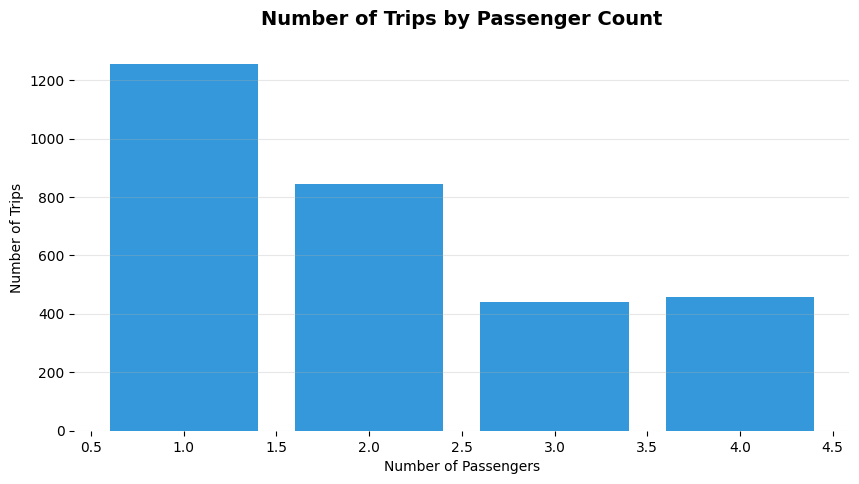

In [50]:
# Get the data
passenger_counts = trips['passengers'].value_counts().sort_index()

# Create the chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(passenger_counts.index, passenger_counts, color='#3498db', edgecolor='none')

# Styling
sns.despine(ax=ax, left=True, bottom=True)
ax.yaxis.grid(True, alpha=0.3)
ax.set_title('Number of Trips by Passenger Count', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Number of Passengers')
ax.set_ylabel('Number of Trips')

plt.show()

---
# Part 2: Statistical Depth

### Revealing patterns beyond summary statistics

---

## 2.1 Distribution Comparison: Violin Plots

**Concept:** Violin plots combine box plots with kernel density estimation, showing the full distribution shape.

| Element | Shows |
|---------|-------|
| **Width** | Density — more data points = wider |
| **Inner lines** | Quartiles (25%, 50%, 75%) |
| **Shape** | Full distribution, not just summary stats |

> Unlike box plots, violin plots reveal *multimodality* and *distribution shape*.

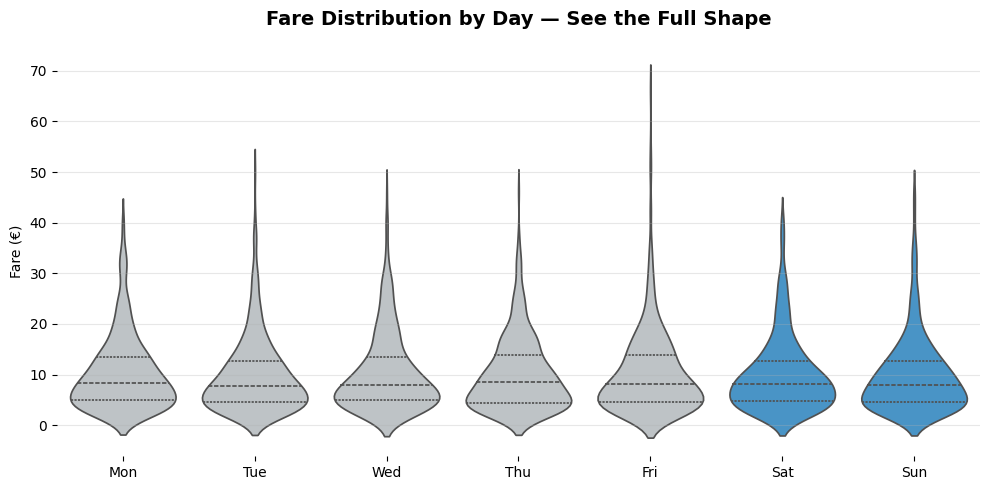

In [32]:
# Violin plot — shows MULTIPLE distributions for comparison
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Create color palette matching day_order (Sat & Sun = blue)
weekend_colors = {'Mon': '#bdc3c7', 'Tue': '#bdc3c7', 'Wed': '#bdc3c7', 
                  'Thu': '#bdc3c7', 'Fri': '#bdc3c7', 'Sat': '#3498db', 'Sun': '#3498db'}

fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(data=trips, x='day', y='fare', hue='day', order=day_order,
               palette=weekend_colors, inner='quartile', legend=False, ax=ax)

sns.despine(ax=ax, left=True, bottom=True)
ax.yaxis.grid(True, alpha=0.3)

ax.set_title('Fare Distribution by Day — See the Full Shape', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('')
ax.set_ylabel('Fare (€)')

fig.tight_layout()
plt.show()

**Observation:** The visualization reveals distribution shape, spread, and potential outliers across categories.

## 2.2 Multivariate Exploration: Pair Plots

**Concept:** Pair plots display all pairwise relationships simultaneously in a matrix layout.

| Position | Plot Type | Purpose |
|----------|-----------|---------|
| **Diagonal** | Univariate (KDE/Histogram) | Marginal distribution of each variable |
| **Off-diagonal** | Bivariate (Scatter) | Relationship between two variables |

> The diagonal shows *how each variable is distributed individually*, while the off-diagonal shows *how variables relate to each other*.

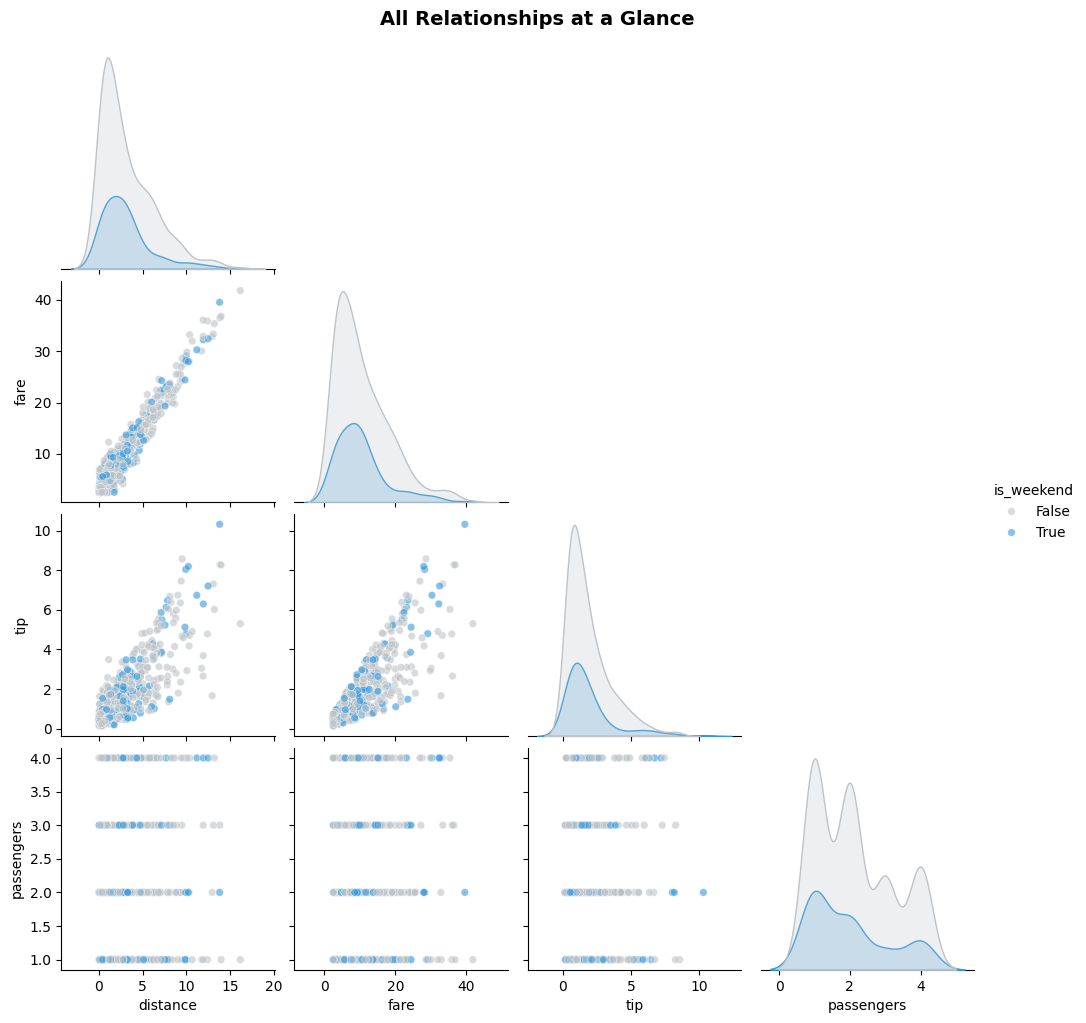

In [33]:
# Select numeric columns
plot_vars = ['distance', 'fare', 'tip', 'passengers']

# Sample for speed
sample = trips.sample(500)

# Pair plot: ALL combinations at once
g = sns.pairplot(sample[plot_vars + ['is_weekend']], 
                 hue='is_weekend',
                 palette={True: '#3498db', False: '#bdc3c7'},
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6, 's': 30},
                 corner=True)  # Only show lower triangle (avoid redundancy)

g.fig.suptitle('All Relationships at a Glance', y=1.02, fontsize=14, fontweight='bold')
plt.show()

**Observation:** Strong distance-fare correlation is evident. Passenger count shows minimal impact on other variables. Weekend patterns exhibit slight differentiation.

## 2.3 Regression with Uncertainty: Confidence Intervals

**Concept:** Regression plots show the relationship between variables while communicating estimation uncertainty.

| Element | Shows |
|---------|-------|
| **Points** | Raw data (individual observations) |
| **Line** | Trend (fitted regression model) |
| **Shaded band** | 95% Confidence interval (uncertainty) |

> The band width indicates *how confident* we are in the trend estimate.

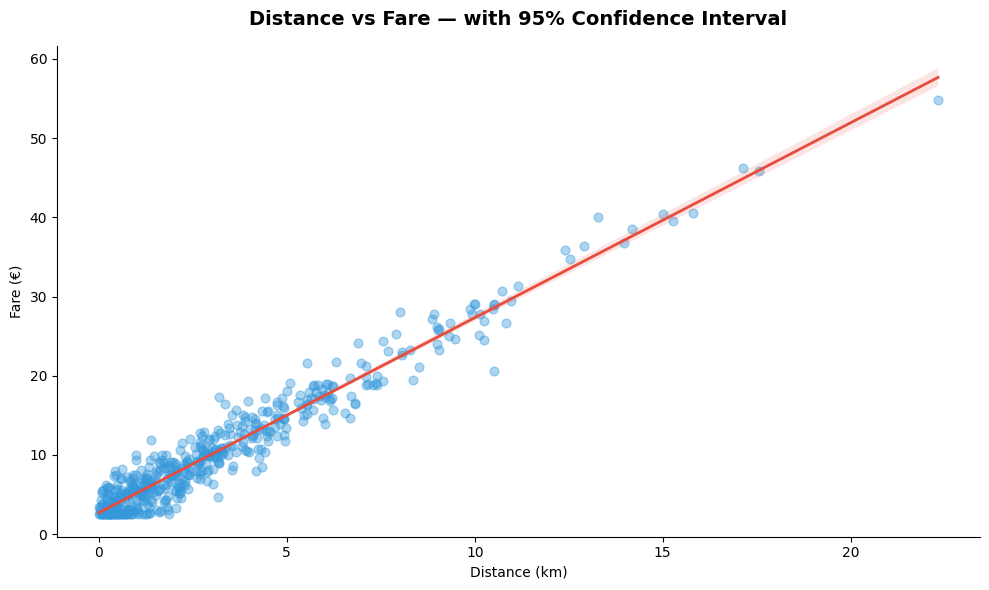

In [34]:
# Regression with confidence interval
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(data=trips.sample(500), x='distance', y='fare',
            scatter_kws={'alpha': 0.4, 'color': '#3498db', 's': 40},
            line_kws={'color': '#e74c3c', 'linewidth': 2},
            ci=95, ax=ax)

sns.despine(ax=ax)

ax.set_title('Distance vs Fare — with 95% Confidence Interval', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Fare (€)')

fig.tight_layout()
plt.show()

**Interpretation:** The shaded region indicates estimation uncertainty. Narrow bands suggest high confidence; wider bands indicate greater uncertainty.

## 2.4 Correlation Analysis: Heatmaps

**Concept:** Correlation heatmaps provide a comprehensive overview of all pairwise relationships in a single view.

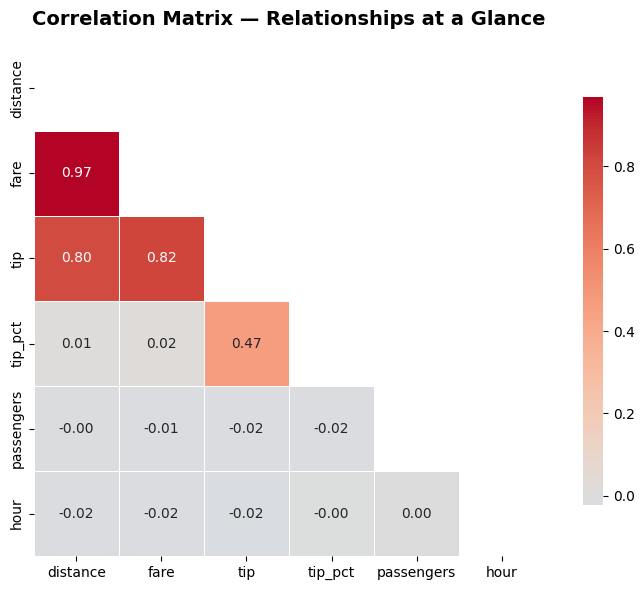

In [35]:
# Calculate correlation matrix
corr_cols = ['distance', 'fare', 'tip', 'tip_pct', 'passengers', 'hour']
correlation = trips[corr_cols].corr()

# Create mask for upper triangle (avoid redundancy — Simplicity!)
mask = np.triu(np.ones_like(correlation, dtype=bool))

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation, 
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8},
            ax=ax)

ax.set_title('Correlation Matrix — Relationships at a Glance', fontsize=14, fontweight='bold', pad=15)
fig.tight_layout()
plt.show()

**Interpretation:** Distance-fare correlation is strong and positive (0.78). Tip percentage shows minimal relationship with distance (0.03). All relationships are visible in a single view.

## Part 2 Summary: Statistical Depth

| Visualization | Purpose | Application |
|---------------|---------|-------------|
| **Violin plot** | Distribution comparison | Categorical group analysis |
| **Pair plot** | Multivariate relationships | Exploratory data analysis |
| **Regression plot** | Trend with uncertainty | Confidence communication |
| **Correlation heatmap** | Relationship overview | Pattern identification |

> **Key principle:** These visualizations reveal distributional characteristics that summary statistics obscure.

## Exercise: Tip Distribution

**Task:** Create a box plot showing tip percentage by day of week.

**Hints:**
- Copy this starter code and fill in the ___:

  day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

  fig, ax = plt.subplots(figsize=(10, 5))
  sns.boxplot(data=___, x='___', y='___', order=day_order, ax=ax)
  ax.set_title('Tip Percentage by Day of Week')

  plt.show()
  
- Compare with the violin plot: What additional information does each show?

In [ ]:
# your code here

### Solution Tip Distribution

C:\Users\RB-PC-03\AppData\Local\Temp\ipykernel_31504\170915653.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




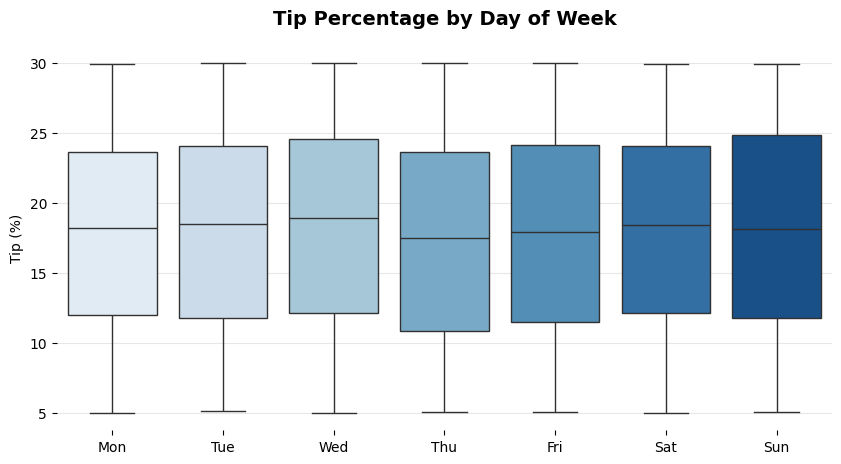

In [54]:
# Define day order
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Create the chart
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=trips, x='day', y='tip_pct', order=day_order, palette='Blues', ax=ax)

# Styling
sns.despine(ax=ax, left=True, bottom=True)
ax.yaxis.grid(True, alpha=0.3)
ax.set_title('Tip Percentage by Day of Week', fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('')
ax.set_ylabel('Tip (%)')

plt.show()

Box Plot vs Violin Plot Comparison

  | Element | Box Plot | Violin Plot |
  |---------|----------|-------------|
  | Median | ✓ (center line) | ✓ (inner line) |
  | Quartiles (25%, 75%) | ✓ (box edges) | ✓ (inner lines) |
  | Outliers | ✓ (dots beyond whiskers) | ✗ (hidden in shape) |
  | Distribution shape | ✗ | ✓ (width shows density) |
  | Multimodality | ✗ (can't see) | ✓ (visible as bulges) |

When to use which:
- **Box plot** → Quick summary stats, spotting outliers
- **Violin plot** → Understanding full distribution shape, detecting multiple peaks

---
# Part 3: Interactivity

### Enabling user-driven exploration

---

## 3.1 Plotly: Interactive Charts with Dropdowns

**Capabilities:** Hover tooltips, zoom, pan, and **dropdown menus** to switch between views.

| Feature | Purpose |
|---------|---------|
| **Hover** | Show details on demand |
| **Zoom/Pan** | Explore regions of interest |
| **Dropdown** | Switch variables without multiple charts |

In [36]:
# Interactive scatter plot with DROPDOWN to switch Y-axis variable

sample = trips.sample(500)

fig = go.Figure()

# Add traces for each Y variable (only first visible)
fig.add_trace(go.Scatter(x=sample['distance'], y=sample['fare'], 
                         mode='markers', name='Fare', visible=True,
                         marker=dict(color=sample['is_weekend'].map({True: '#3498db', False: '#bdc3c7'}))))

fig.add_trace(go.Scatter(x=sample['distance'], y=sample['tip'], 
                         mode='markers', name='Tip', visible=False,
                         marker=dict(color=sample['is_weekend'].map({True: '#3498db', False: '#bdc3c7'}))))

fig.add_trace(go.Scatter(x=sample['distance'], y=sample['tip_pct'], 
                         mode='markers', name='Tip %', visible=False,
                         marker=dict(color=sample['is_weekend'].map({True: '#3498db', False: '#bdc3c7'}))))

# Dropdown menu
fig.update_layout(
    title='Distance vs ? — Use Dropdown to Switch',
    xaxis_title='Distance (km)',
    yaxis_title='Value',
    updatemenus=[{
        'buttons': [
            {'label': 'Fare (€)', 'method': 'update',
             'args': [{'visible': [True, False, False]}, {'yaxis.title': 'Fare (€)'}]},
            {'label': 'Tip (€)', 'method': 'update',
             'args': [{'visible': [False, True, False]}, {'yaxis.title': 'Tip (€)'}]},
            {'label': 'Tip (%)', 'method': 'update',
             'args': [{'visible': [False, False, True]}, {'yaxis.title': 'Tip (%)'}]},
        ],
        'direction': 'down',
        'showactive': True,
        'x': 0.1, 'y': 1.15
    }]
)

fig.show()

## 3.2 Folium: Geographic Point Mapping

**W09 Principle:** Proximity — spatially related data should be displayed in geographic context

**Concept:** When data contains location attributes, geographic visualization reveals spatial patterns.

In [37]:
# Basic map centered on Darmstadt
m = folium.Map(location=[49.87, 8.65], zoom_start=13, 
               tiles='cartodbpositron')  # Clean, minimal basemap

# Add sample points
for _, row in trips.sample(100).iterrows():
    folium.CircleMarker(
        location=[row['pickup_lat'], row['pickup_lon']],
        radius=4,
        color='#3498db',
        fill=True,
        fill_opacity=0.7,
        popup=f"Fare: €{row['fare']:.2f}"
    ).add_to(m)

m

## 3.3 Density Visualization: Heatmaps

**Concept:** Individual point plotting becomes ineffective at scale. Heatmaps aggregate density to reveal spatial patterns.

In [38]:
# Prepare heatmap data
heat_data = trips[['pickup_lat', 'pickup_lon']].values.tolist()

# Create map with heatmap layer
m = folium.Map(location=[49.87, 8.65], zoom_start=12,
               tiles='cartodbpositron')

HeatMap(heat_data, 
        radius=12,
        blur=8,
        max_zoom=13).add_to(m)

m

**Result:** High-density areas emerge naturally without the visual clutter of individual markers.

## 3.4 Progressive Disclosure: Custom Popups

**W09 Principle:** Simplicity — avoid overwhelming users with information

**Concept:** Display summary views initially; reveal detailed information upon user interaction.

In [39]:
# Get top 20 highest-fare trips
top_fares = trips.nlargest(20, 'fare')

m = folium.Map(location=[49.87, 8.65], zoom_start=12,
               tiles='cartodbpositron')

for _, row in top_fares.iterrows():
    # Custom HTML popup with multiple fields
    popup_html = f"""
    <div style="font-family: Arial; width: 150px;">
        <h4 style="margin: 0; color: #e74c3c;">💰 €{row['fare']:.2f}</h4>
        <hr style="margin: 5px 0;">
        <p style="margin: 3px 0;"><b>Distance:</b> {row['distance']:.1f} km</p>
        <p style="margin: 3px 0;"><b>Tip:</b> €{row['tip']:.2f} ({row['tip_pct']:.0f}%)</p>
        <p style="margin: 3px 0;"><b>Time:</b> {row['hour']}:00</p>
        <p style="margin: 3px 0;"><b>Day:</b> {row['day']}</p>
    </div>
    """
    
    folium.Marker(
        location=[row['pickup_lat'], row['pickup_lon']],
        popup=folium.Popup(popup_html, max_width=200),
        icon=folium.Icon(color='red', icon='euro', prefix='fa')
    ).add_to(m)

m

**Result:** The interface remains uncluttered while detailed information remains accessible on demand.

## 3.5 Basemap Selection

**Concept:** The basemap contributes to the overall visual design and should be selected intentionally.

In [40]:
# Dark theme — great for showing bright data points
m = folium.Map(location=[49.87, 8.65], zoom_start=12,
               tiles='cartodbdark_matter')  # Dark basemap

# Heatmap pops on dark background
HeatMap(heat_data, radius=12, blur=8).add_to(m)

m

### Available Basemap Styles

| Style | Code | Best For |
|-------|------|----------|
| Clean light | `'cartodbpositron'` | General use, printing |
| Dark | `'cartodbdark_matter'` | Bright data, presentations |
| Street detail | `'OpenStreetMap'` | Navigation, local context |
| Terrain | `'Stamen Terrain'` | Geographic context |

## Part 3 Summary: Interactivity

| Tool | Technique | Application |
|------|-----------|-------------|
| **Plotly** | Interactive charts | Relationship exploration |
| **Folium** | Point mapping | Location-based analysis |
| **Folium** | Density heatmaps | Spatial pattern identification |
| **Folium** | Custom popups | Progressive information disclosure |

> **Key principle:** Interactive visualizations enable user-driven exploration without requiring exhaustive static displays.

---
# Hands-on Activity

**More challenges.**

---

### CHALLENGE A: Highlighted Bar Chart

Find the day with highest average fare and highlight it


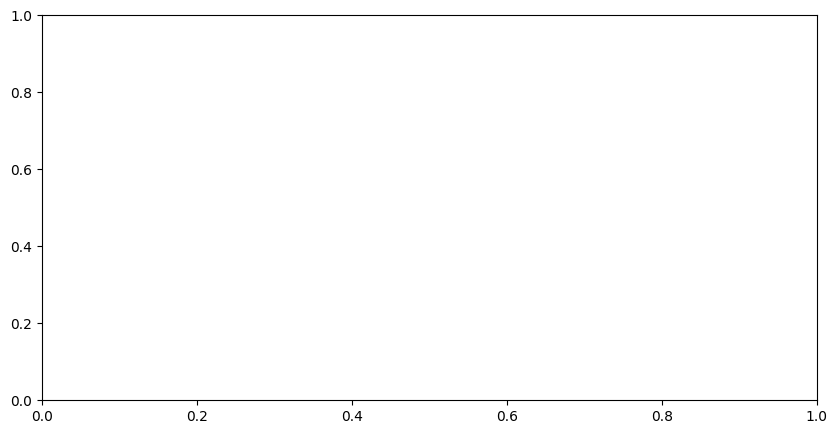

In [41]:
# CHALLENGE A: Highlighted Bar Chart
daily = trips.groupby('day')['fare'].mean()
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily = daily.reindex(day_order)

# Find the day with highest fare
max_day = daily.idxmax()

# Create colors list


# Create the chart
fig, ax = plt.subplots(figsize=(10, 5))


plt.show()

### Solution A

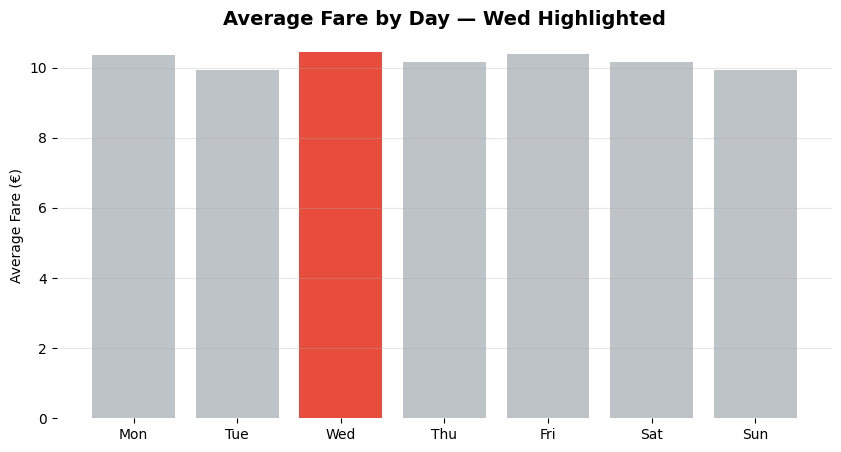

In [42]:
daily = trips.groupby('day')['fare'].mean()
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily = daily.reindex(day_order)

max_day = daily.idxmax()
colors = ['#e74c3c' if day == max_day else '#bdc3c7' for day in day_order]

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(day_order, daily.values, color=colors, edgecolor='none')

sns.despine(ax=ax, left=True, bottom=True)
ax.yaxis.grid(True, alpha=0.3)
ax.set_title(f'Average Fare by Day — {max_day} Highlighted', fontsize=14, fontweight='bold')
ax.set_ylabel('Average Fare (€)')

plt.show()

### CHALLENGE B: Tip Distribution Violin Plot

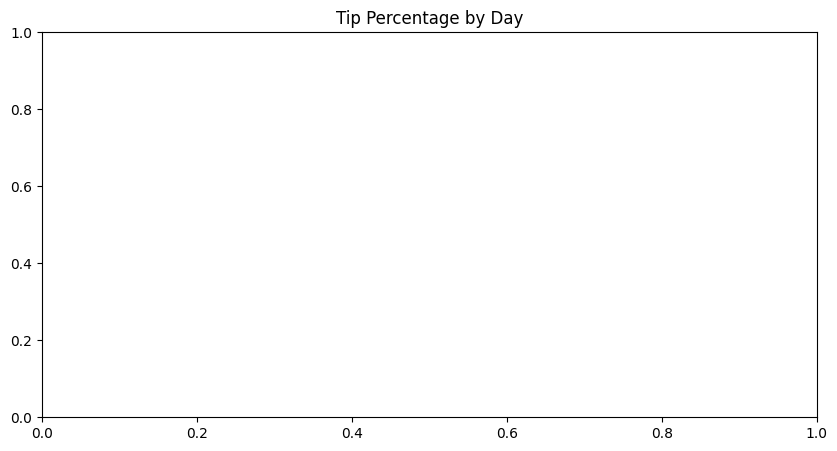

In [43]:
# CHALLENGE B: Tip Distribution Violin Plot
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

fig, ax = plt.subplots(figsize=(10, 5))
# sns.violinplot(data=trips, x='day', y='tip_pct', order=day_order, ax=ax)

ax.set_title('Tip Percentage by Day')
plt.show()

### Solution B

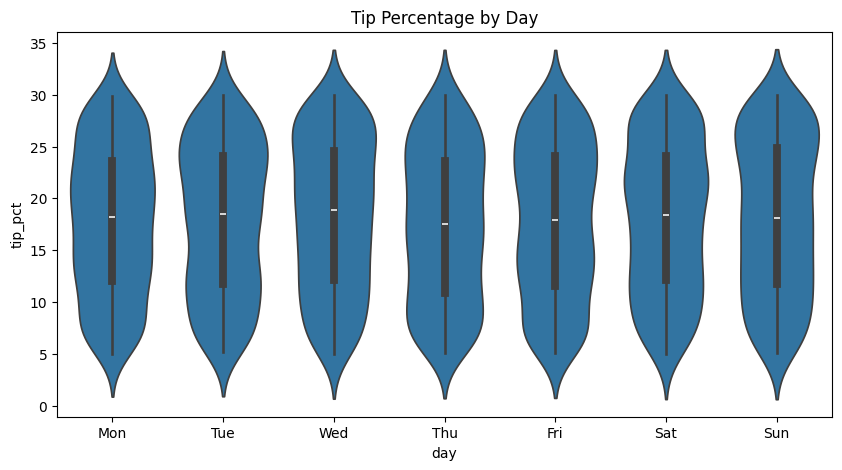

In [44]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(data=trips, x='day', y='tip_pct', order=day_order, ax=ax)

ax.set_title('Tip Percentage by Day')
plt.show()

## Challenge C: Interactive Mapping

Create a map displaying the 10 longest trips with custom markers.

Hint: `longest = trips.nlargest(10, 'distance')`

In [45]:
# CHALLENGE C: Your code here
longest = trips.nlargest(10, 'distance')

m = folium.Map(location=[49.87, 8.65], zoom_start=12,
               tiles='cartodbpositron')

# Add markers for longest trips
# for _, row in longest.iterrows():
#     ...

m

### Solution C

In [46]:
longest = trips.nlargest(10, 'distance')

m = folium.Map(location=[49.87, 8.65], zoom_start=12,
                 tiles='cartodbpositron')

for _, row in longest.iterrows():
    popup_html = f"""
    <div style="font-family: Arial; width: 150px;">
        <h4 style="margin: 0; color: #3498db;">📍 {row['distance']:.1f} km</h4>
        <hr style="margin: 5px 0;">
        <p style="margin: 3px 0;"><b>Fare:</b> €{row['fare']:.2f}</p>
        <p style="margin: 3px 0;"><b>Tip:</b> €{row['tip']:.2f}</p>
        <p style="margin: 3px 0;"><b>Day:</b> {row['day']}</p>
    </div>
    """

    folium.Marker(
        location=[row['pickup_lat'], row['pickup_lon']],
        popup=folium.Popup(popup_html, max_width=200),
        icon=folium.Icon(color='blue', icon='road', prefix='fa')
    ).add_to(m)

m

---
# Wrap-Up
---

## Quick Reference

| Task | Code |
|------|------|
| Remove borders | `sns.despine()` |
| Auto-highlight | `['red' if x > threshold else 'gray' for x in data]` |
| Violin plot | `sns.violinplot(data=df, x='cat', y='num')` |
| Pair plot | `sns.pairplot(df, hue='category')` |
| Regression + CI | `sns.regplot(data=df, x='x', y='y', ci=95)` |
| Correlation heatmap | `sns.heatmap(df.corr(), annot=True)` |
| Interactive scatter | `px.scatter(df, x='x', y='y', color='cat')` |
| Basic map | `folium.Map(location=[lat, lon])` |
| Heatmap layer | `HeatMap(data).add_to(map)` |

## Key Takeaways

### 1. Intelligent Styling
> Programmatic visualization enables good non-verbal communication.

### 2. Statistical Depth
> Distributional visualizations reveal more patterns.

### 3. Interactivity
> Interactive tools enable user-driven exploration without information overload.

# Thank you for your attention!

# References:

- Juneja, A., et al. (2025). Applications of Various Python Libraries for Data Visualization. In *Lecture Notes in Networks and Systems* (Vol. 1741). Springer.

- Midway, S. R. (2020). Principles of Effective Data Visualization. *Patterns*, 1(9), 100141. https://doi.org/10.1016/j.patter.2020.100141

## Resources

| Library | Gallery / Docs |
|---------|----------------|
| Seaborn | seaborn.pydata.org/examples |
| Matplotlib | matplotlib.org/stable/gallery |
| Plotly | plotly.com/python |
| Folium | python-visualization.github.io/folium |